# 1. For reading and understanding import libraries 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [82]:
df_train1 =pd.read_csv(r'G:\kaggle-24\Titanic-23\train.csv')
df_test1 = pd.read_csv(r'G:\kaggle-24\Titanic-23\test.csv')
df = pd.concat([df_train1, df_test1], axis = 0, ignore_index = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data preprocessing

In [83]:
df.shape

(1309, 12)

In [84]:
percent_null = ((df.isnull().sum()/len(df))*100,round(2))
percent_null

(PassengerId     0.000000
 Survived       31.932773
 Pclass          0.000000
 Name            0.000000
 Sex             0.000000
 Age            20.091673
 SibSp           0.000000
 Parch           0.000000
 Ticket          0.000000
 Fare            0.076394
 Cabin          77.463713
 Embarked        0.152788
 dtype: float64,
 2)

In [85]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

SibSp (Siblings/Spouses Aboard): The number of siblings or spouses the passenger had on board.
Parch (Parents/Children Aboard): The number of parents or children the passenger had on board.
                       Embarked: The port where the passenger boarded the ship. It can take values 
                                 'C' (Cherbourg), 'Q' (Queenstown), or 'S' (Southampton).

In [86]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include = 'number').columns
print(f"categorical_features= {cat_features} \n numeric_features= {num_features}")

categorical_features= Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object') 
 numeric_features= Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [88]:
# Map Pclass values to "first", "second", and "third"
class_mapping = {1: 'first', 2: 'second', 3: 'third'}
df['Pclass'] = df['Pclass'].map(class_mapping)

In [89]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

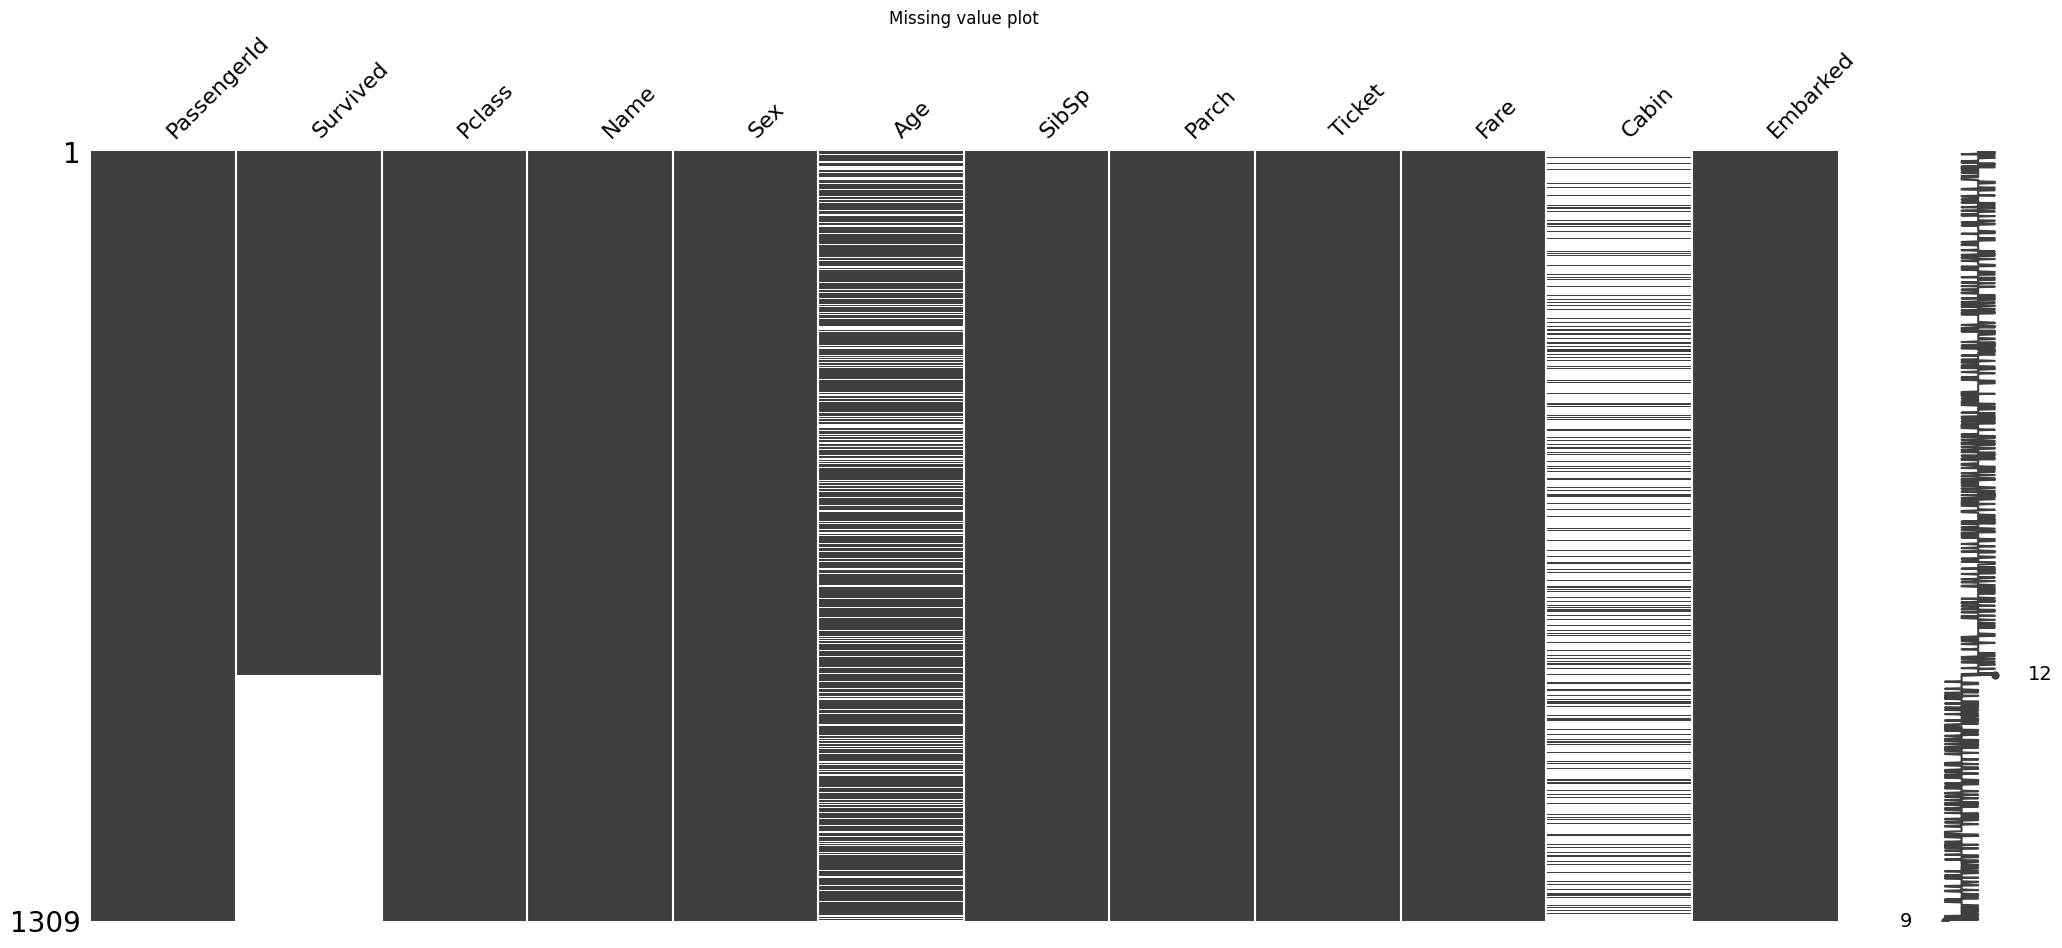

In [90]:
import missingno as msno
msno.matrix(df)
plt.title("Missing value plot")
plt.show()

In [91]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Pclass
['third' 'first' 'second']
--------------------------------------------------
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
--------------------------------------------------
Sex
['male' 'female']
--------------------------------------------------
Ticket
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '

In [92]:
# Name, Cabin and Ticket feature is not relevant for predicting. So drop 3 features.
df.drop(columns = ["Name","Cabin","Ticket"], inplace = True)

In [93]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,third,male,22.0,1,0,7.2500,S
1,2,1.0,first,female,38.0,1,0,71.2833,C
2,3,1.0,third,female,26.0,0,0,7.9250,S
3,4,1.0,first,female,35.0,1,0,53.1000,S
4,5,0.0,third,male,35.0,0,0,8.0500,S


In [94]:
df['Age']= df['Age'].fillna(df['Age'].median())
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare']= df['Fare'].fillna(df['Fare'].mean())

In [95]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.486592,12.905241,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329200


# EDA

In [96]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("."*50)

PassengerId
PassengerId
1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: count, Length: 1309, dtype: int64
..................................................
Survived
Survived
0.0    549
1.0    342
Name: count, dtype: int64
..................................................
Pclass
Pclass
third     709
first     323
second    277
Name: count, dtype: int64
..................................................
Sex
Sex
male      843
female    466
Name: count, dtype: int64
..................................................
Age
Age
28.0    295
24.0     47
22.0     43
21.0     41
30.0     40
       ... 
23.5      1
70.5      1
55.5      1
20.5      1
38.5      1
Name: count, Length: 98, dtype: int64
..................................................
SibSp
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64
..................................................
Parch
Parch
0    1002
1     170

In [97]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Not Survived    549
Survived        342
Name: count, dtype: int64
Sex
male      843
female    466
Name: count, dtype: int64


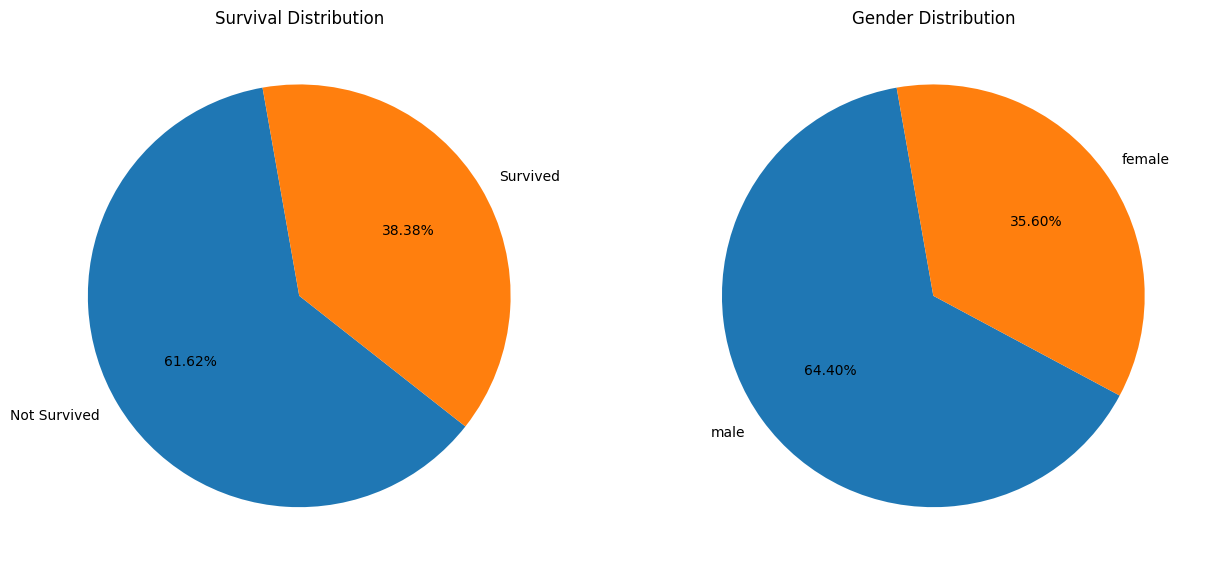

In [98]:
plt.figure(figsize=(15, 8))

# Subplot 1: Pie chart for 'Survived'
plt.subplot(1, 2, 1)
value_survived = df['Survived'].value_counts()
value_survived.index = ['Not Survived', 'Survived']
print(value_survived)
plt.pie(value_survived, labels=value_survived.index, autopct="%1.2f%%", startangle=100)
plt.title('Survival Distribution')

# Subplot 2: Pie chart for 'Sex'
plt.subplot(1, 2, 2)
value_sex = df['Sex'].value_counts()
print(value_sex)
plt.pie(value_sex, labels=value_sex.index, autopct="%1.2f%%", startangle=100)
plt.title('Gender Distribution')

plt.show()

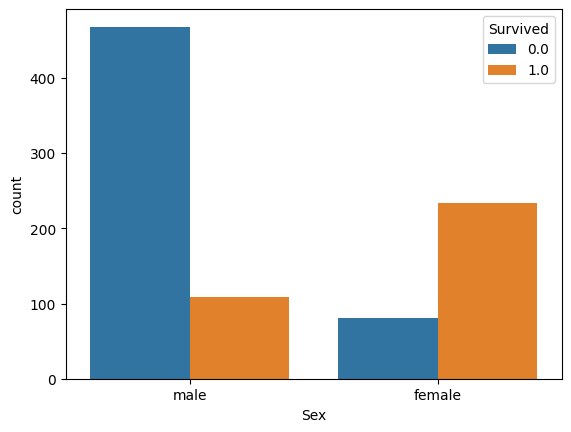

In [99]:
sns.countplot(data= df, x='Sex', hue='Survived')
plt.show()

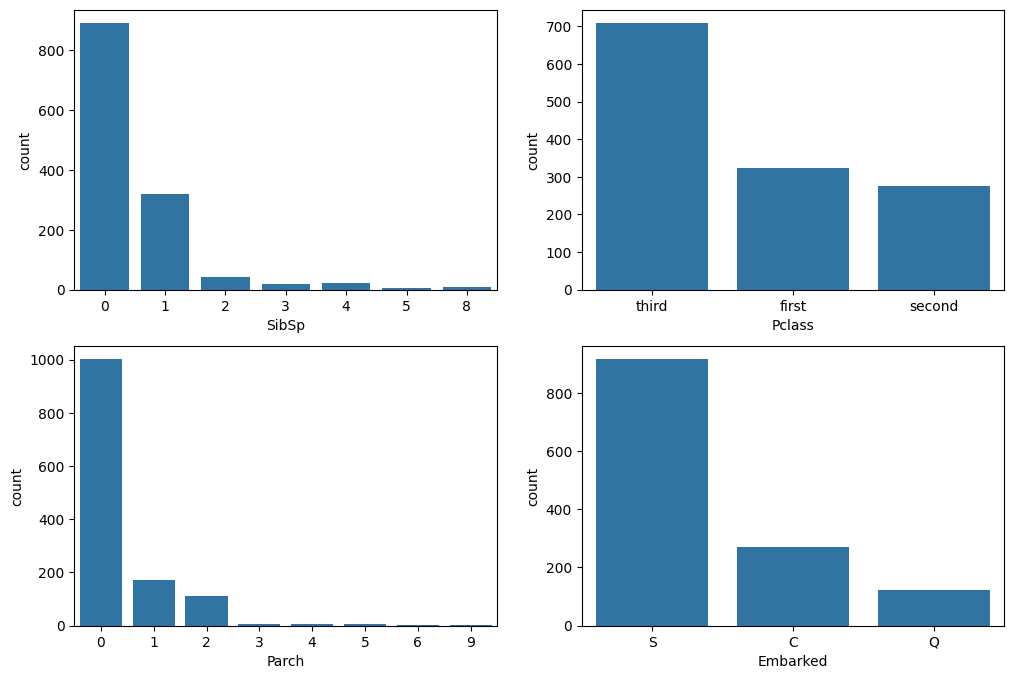

In [100]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x ="SibSp")

plt.subplot(2,2,2)
sns.countplot(data = df, x ="Pclass")

plt.subplot(2,2,3)
sns.countplot(data = df, x ="Parch")

plt.subplot(2,2,4)
sns.countplot(data = df, x ="Embarked")

plt.show()

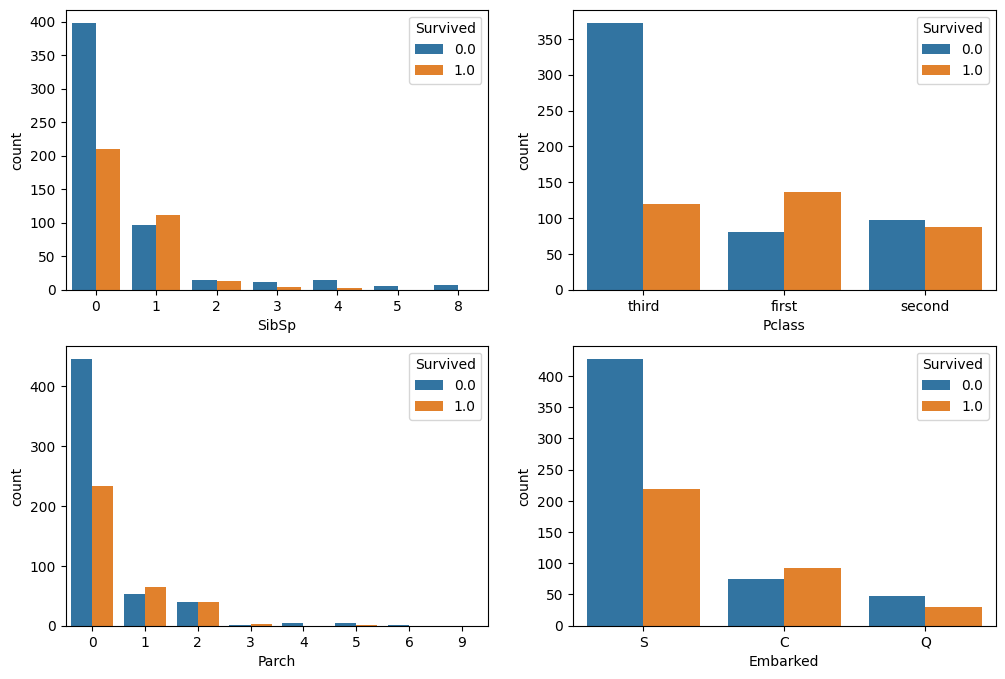

In [101]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x ="SibSp", hue = 'Survived')

plt.subplot(2,2,2)
sns.countplot(data = df, x ="Pclass", hue = 'Survived')

plt.subplot(2,2,3)
sns.countplot(data = df, x ="Parch", hue = 'Survived')

plt.subplot(2,2,4)
sns.countplot(data = df, x ="Embarked", hue = 'Survived')

plt.show()

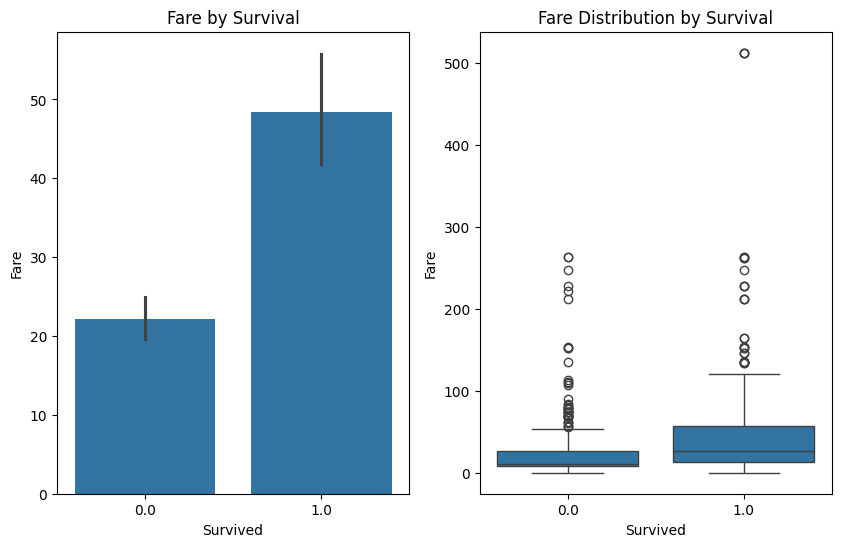

In [102]:
# Create a bar plot
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.barplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')

plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Fare', data=df) 
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

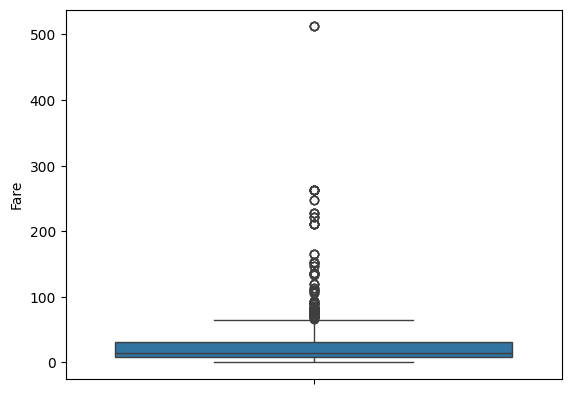

In [103]:
sns.boxplot(data=df['Fare']) 
plt.show()

In [104]:
df['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

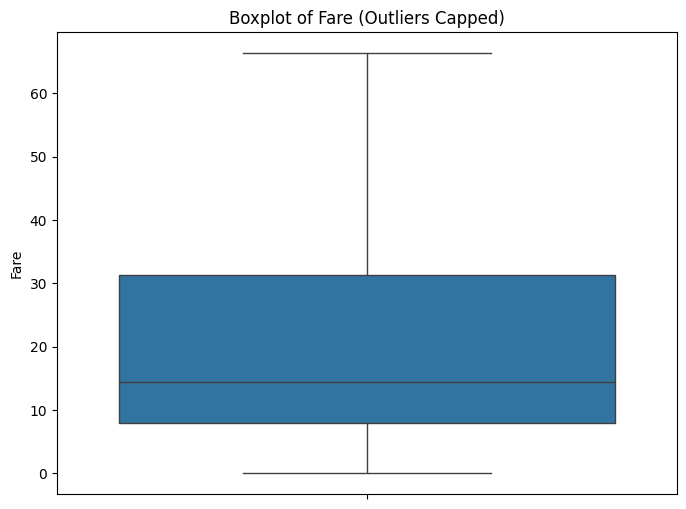

In [105]:
# Calculate quartiles and IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers by setting values beyond the bounds to the bounds
df['Fare'] = np.where(df['Fare'] > upper, upper, df['Fare'])

# Visualize the boxplot after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Fare'])
plt.title('Boxplot of Fare (Outliers Capped)')
plt.show()

Skewness of Original Fare: 1.0878208718475646


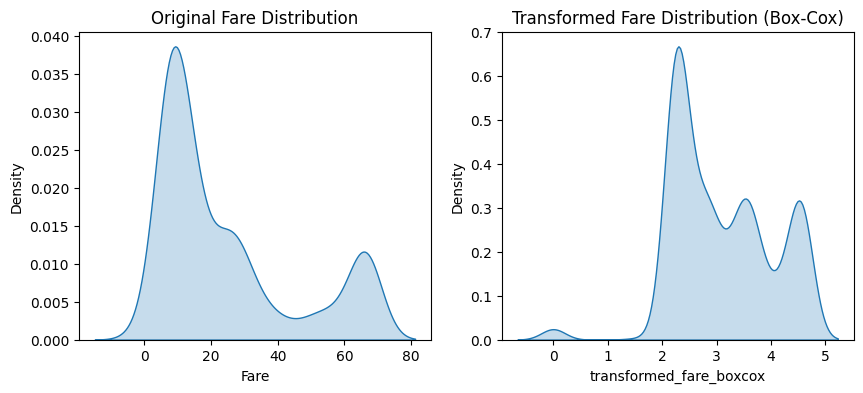

Skewness of Transformed Fare (Box-Cox): 0.0014409819682182716


In [106]:
from scipy.stats import boxcox

# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
transformed_fare, lambda_value = boxcox(df['Fare'] + 1)  # Adding 1 to handle zero values
df['transformed_fare_boxcox'] = transformed_fare

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transformed_fare_boxcox'], fill = True)
plt.title('Transformed Fare Distribution (Box-Cox)')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare (Box-Cox):", df['transformed_fare_boxcox'].skew())

Skewness of Original Fare: 1.0878208718475646


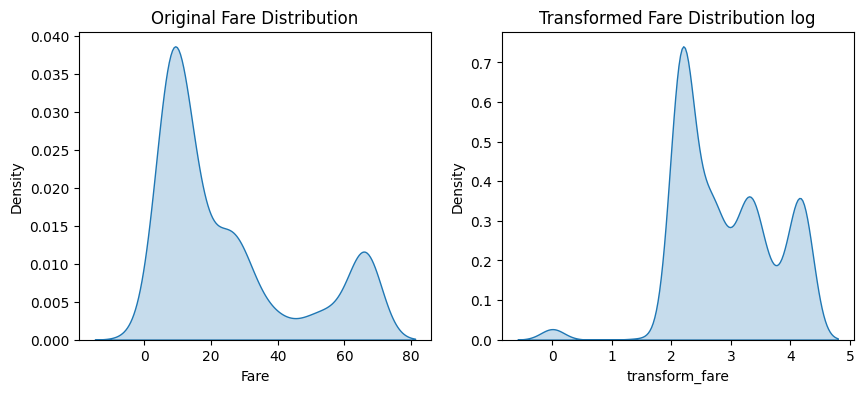

Skewness of Transformed Fare log: -0.10460035316263437


In [107]:
# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
df['transform_fare'] = np.log1p(df['Fare'])

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transform_fare'], fill = True)
plt.title('Transformed Fare Distribution log')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare log:", df['transform_fare'].skew())

Skewness of Original Fare: 1.0878208718475646


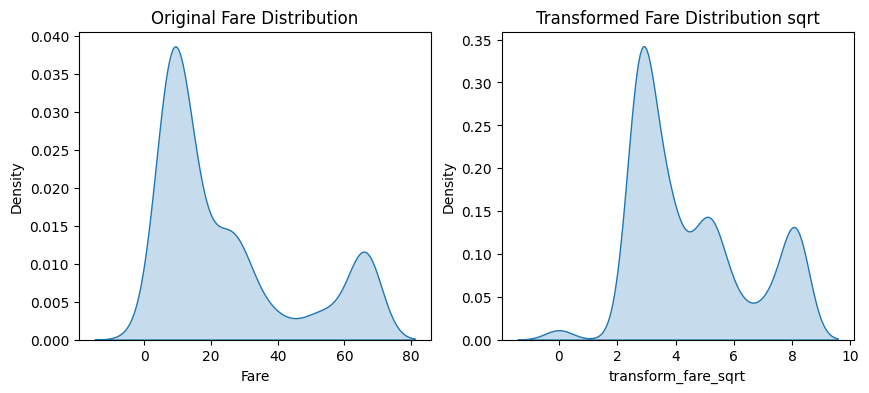

Skewness of Transformed Fare sqrt: 0.6322899818407495


In [108]:
# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
df['transform_fare_sqrt'] = np.sqrt(df['Fare'])

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transform_fare_sqrt'], fill = True)
plt.title('Transformed Fare Distribution sqrt')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare sqrt:", df['transform_fare_sqrt'].skew())

In [109]:
df.drop(columns = ['Fare','transform_fare','transform_fare_sqrt'], inplace=True)

In [110]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,transformed_fare_boxcox
0,1,0.0,third,male,22.0,1,0,S,2.198188
1,2,1.0,first,female,38.0,1,0,C,4.569691
2,3,1.0,third,female,26.0,0,0,S,2.283608
3,4,1.0,first,female,35.0,1,0,S,4.313319
4,5,0.0,third,male,35.0,0,0,S,2.298741


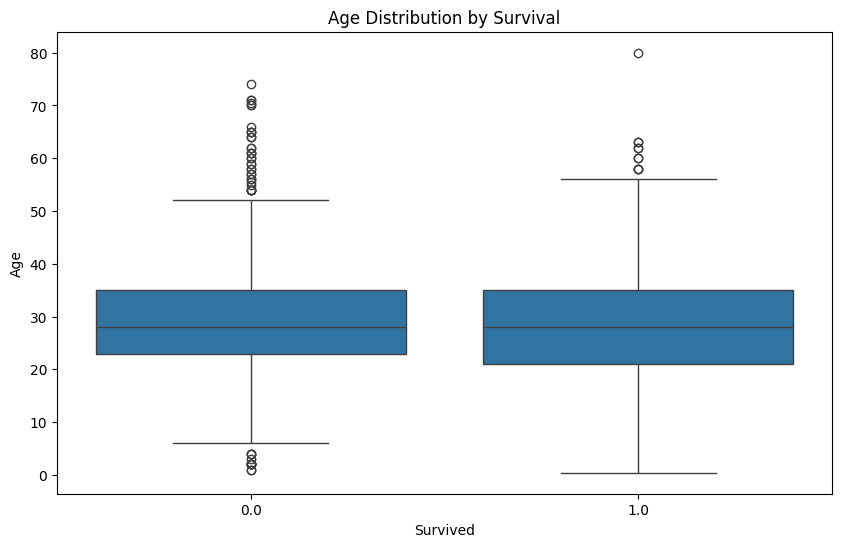

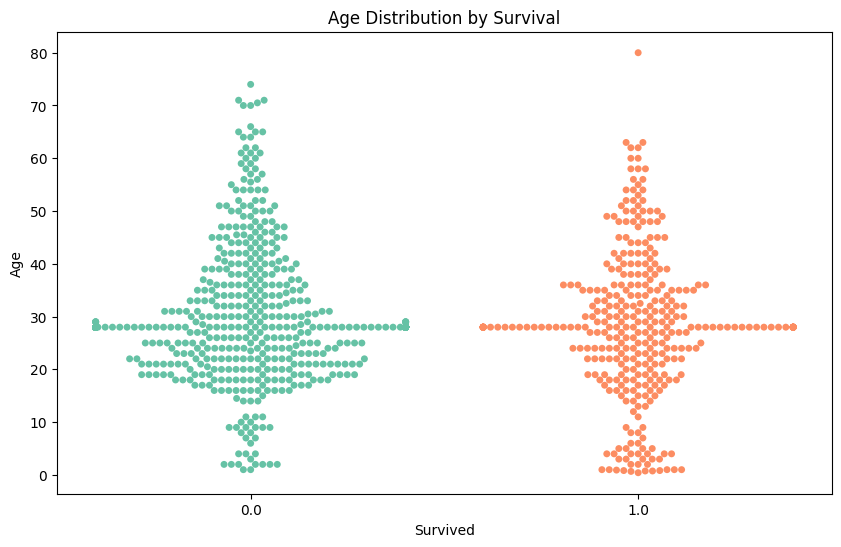

In [111]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Swarm plot (individual data points)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [112]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,transformed_fare_boxcox
0,1,0.0,third,male,22.0,1,0,S,2.198188
1,2,1.0,first,female,38.0,1,0,C,4.569691
2,3,1.0,third,female,26.0,0,0,S,2.283608
3,4,1.0,first,female,35.0,1,0,S,4.313319
4,5,0.0,third,male,35.0,0,0,S,2.298741


In [113]:
df['family_size'] = df['SibSp'] + df['Parch']

In [114]:
df.drop(columns=['SibSp','Parch'], inplace = True)

In [115]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,transformed_fare_boxcox,family_size
0,1,0.0,third,male,22.0,S,2.198188,1
1,2,1.0,first,female,38.0,C,4.569691,1
2,3,1.0,third,female,26.0,S,2.283608,0
3,4,1.0,first,female,35.0,S,4.313319,1
4,5,0.0,third,male,35.0,S,2.298741,0


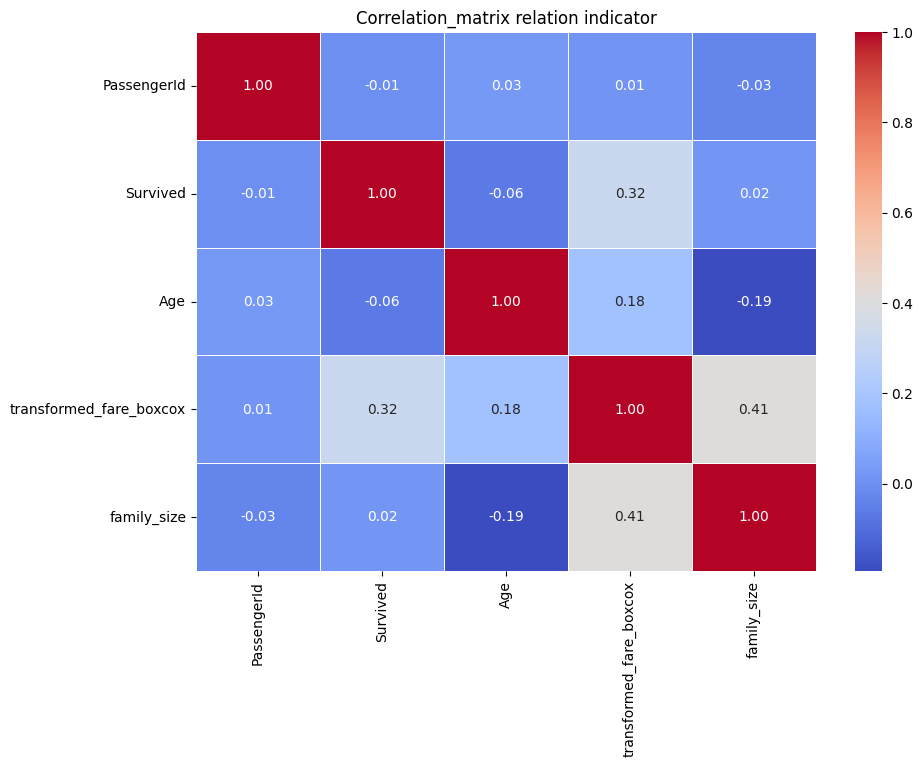

In [116]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(correlation_matrix, annot =True, fmt = ".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation_matrix relation indicator")
plt.show()

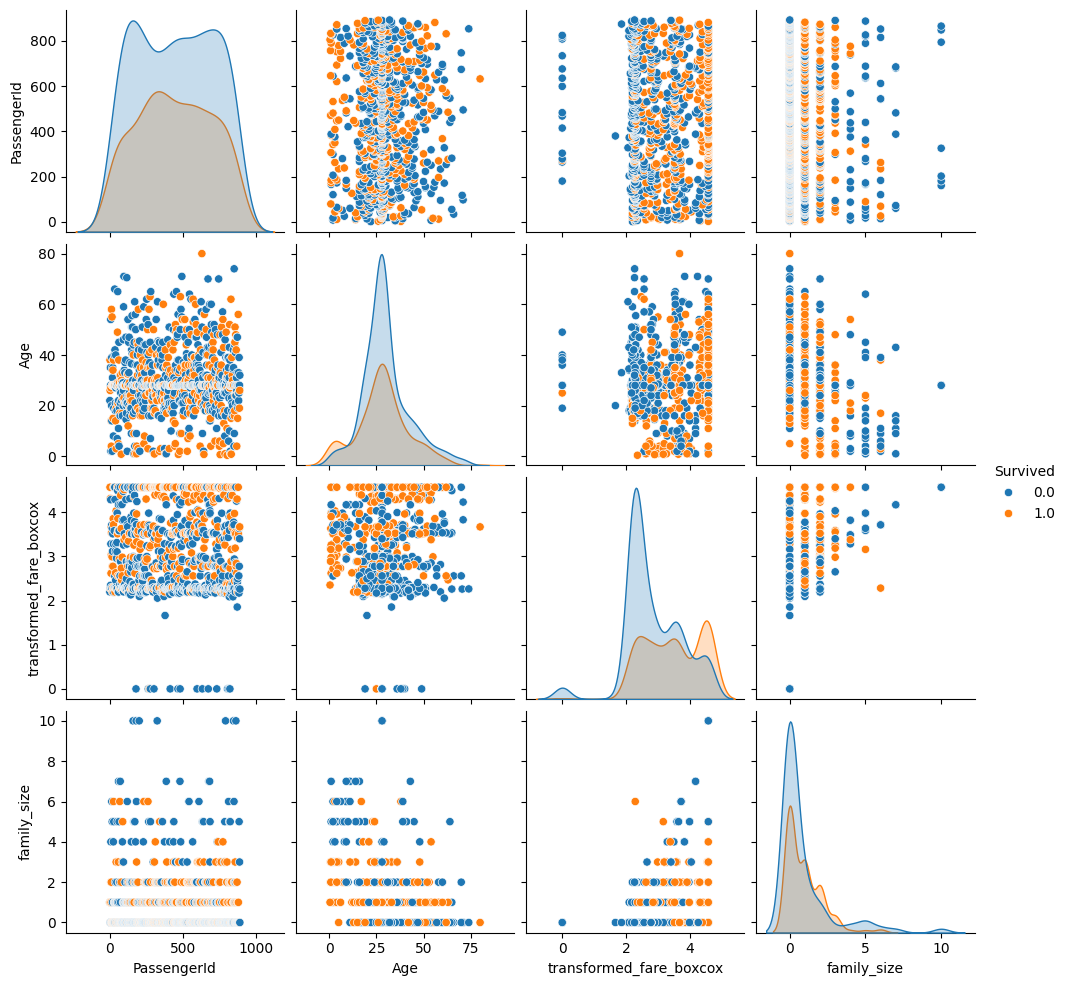

In [117]:
sns.pairplot(data=df, hue ='Survived')
plt.show()

In [118]:
# For future work create a data frame
train_cleaned_data = df.iloc[0:891]

output_file_path = r'G:\PROJECTS-2024\Titanic-ML from disaster\notebooks\train_cleaned_data.csv'
train_cleaned_data.to_csv(output_file_path, index=False)
print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to G:\PROJECTS-2024\Titanic-ML from disaster\notebooks\train_cleaned_data.csv


In [119]:
# For future work create a data frame
test_prepare_data = df.iloc[891:1309]

output_file_path = r'G:\PROJECTS-2024\Titanic-ML from disaster\notebooks\test_prepare_data.csv'
test_prepare_data.to_csv(output_file_path, index=False)
print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to G:\PROJECTS-2024\Titanic-ML from disaster\notebooks\test_prepare_data.csv
